**Question 1. Choose a text analytic data set from kaggle (more than 1000 rows) and apply text preprocessing techniques.**


* Examine the text data closely and see which set of stopwords you can add into your set.
* what type of patterns should be deleted from the text
* whether it requires lemmatization or stemming
* output should be as clean as possible
* special credits to some innovative techniques you can apply to clean the text apart from what discussed in the class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import math
import re

In [2]:
df=pd.read_csv("dataset.csv",encoding="latin1")

In [3]:
df.shape

(3798, 6)

In [4]:
df.isnull().sum(axis=0)

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [5]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Upper Casing

In [6]:
df["OriginalTweet"] = df["OriginalTweet"].str.upper()

In [7]:
df['OriginalTweet'][2]

'FIND OUT HOW YOU CAN PROTECT YOURSELF AND LOVED ONES FROM #CORONAVIRUS. ?'

In [8]:
df["OriginalTweet"] = df["OriginalTweet"].str.lower()

**Removal of URLs**

In [9]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.split('HTTPS:\/\/.*', str(x))[0])

In [10]:
df['OriginalTweet'][0]

'trending: new yorkers encounter empty supermarket shelves (pictured, wegmans in brooklyn), sold-out online grocers (foodkick, maxdelivery) as #coronavirus-fearing shoppers stock up https://t.co/gr76pcrlwh https://t.co/ivmkmsqdt1'

In [11]:
! pip install pyspellchecker

In [12]:
from spellchecker import SpellChecker

In [13]:
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [16]:
df['OriginalTweet']=df['OriginalTweet'].astype(str)

In [17]:
for i in range(len(df.index)):
  df['OriginalTweet'][i]=correct_spellings((df['OriginalTweet'][i]))

TypeError: sequence item 14: expected str instance, NoneType found

Remove Hashtags #

In [19]:
df['OriginalTweet'][3]

'#panic buying hits #newyork city as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #bigapple 1st confirmed #coronavirus patient or a #bloomberg staged event?\r\r\n\r\r\nhttps://t.co/iasiregpc4\r\r\n\r\r\n#qanon #qanon2018 #qanon2020 \r\r\n#election2020 #cdc https://t.co/29iszoewxu'

In [20]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub('#([a-zA-Z0-9_]{1,50})', '', str(x)))

In [21]:
df['OriginalTweet'][3]

' buying hits  city as anxious shoppers stock up on food&amp;medical supplies after  worker in her 30s becomes  1st confirmed  patient or a  staged event?\r\r\n\r\r\nhttps://t.co/iasiregpc4\r\r\n\r\r\n   \r\r\n  https://t.co/29iszoewxu'

Remove Mentions @

In [22]:
df['OriginalTweet'][7]

'@drtedros "we canâ\x92t stop  without protecting .\r\r\nprices of surgical masks have increased six-fold, n95 respirators have more than trebled &amp; gowns cost twice as much"-@drtedros '

In [23]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub('@[A-Za-z0-9_]+', '', str(x)))

In [24]:
df['OriginalTweet'][7]

' "we canâ\x92t stop  without protecting .\r\r\nprices of surgical masks have increased six-fold, n95 respirators have more than trebled &amp; gowns cost twice as much"- '

Removal of Punctuations

In [25]:
df['OriginalTweet'][7]

' "we canâ\x92t stop  without protecting .\r\r\nprices of surgical masks have increased six-fold, n95 respirators have more than trebled &amp; gowns cost twice as much"- '

In [26]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [27]:
df['OriginalTweet'][7]

' we canâ\x92t stop  without protecting \r\r\nprices of surgical masks have increased sixfold n95 respirators have more than trebled amp gowns cost twice as much '

Remove Stopwords

In [28]:
! pip install nltk

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('trending')
stop_words.add('hi twitter')
stop_words.add('hi all')
stop_words.add('hey')
stop_words.add('reminder')
stop_words.add('hello everyone')
stop_words.add('at first')
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: remove_stopwords(x))

In [31]:
df['OriginalTweet'][0]

'new yorkers encounter empty supermarket shelves pictured wegmans brooklyn soldout online grocers foodkick maxdelivery fearing shoppers stock httpstcogr76pcrlwh httpstcoivmkmsqdt1'

Stemming

In [32]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df["OriginalTweet"] = df['OriginalTweet'].apply(lambda x: stem_words(x))

In [33]:
df["OriginalTweet"][0]

'new yorker encount empti supermarket shelv pictur wegman brooklyn soldout onlin grocer foodkick maxdeliveri fear shopper stock httpstcogr76pcrlwh httpstcoivmkmsqdt1'

Lemmatizing

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["OriginalTweet"] = df['OriginalTweet'].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package omw-1.4 to /home/mac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
df['OriginalTweet'][0]

'new yorker encount empti supermarket shelv pictur wegman brooklyn soldout onlin grocer foodkick maxdeliveri fear shopper stock httpstcogr76pcrlwh httpstcoivmkmsqdt1'

**Question 2. Download the google.csv from the blackboard (Time series data set) and answer the following questions.**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("google.csv")

In [41]:
df.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

**i) Examine the correlation in data**

In [42]:
a = df.corr();
a

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999304,0.999166,0.998701,0.980822,-0.298361
High,0.999304,1.000000,0.998653,0.999301,0.978697,-0.289132
Low,0.999166,0.998653,1.000000,0.999262,0.984535,-0.306212
Close,0.998701,0.999301,0.999262,1.000000,0.982123,-0.296948
Adj Close,0.980822,0.978697,0.984535,0.982123,1.000000,-0.295280
Volume,-0.298361,-0.289132,-0.306212,-0.296948,-0.295280,1.000000


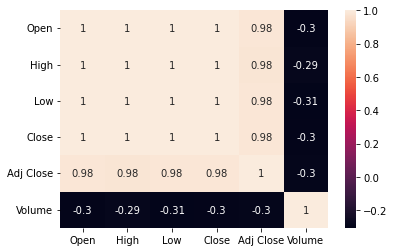

In [43]:
sns.heatmap(a, annot = True)
plt.show()

**ii) Visualize the trend in volume of stock data**

In [44]:
date = pd.to_datetime(df['Date'])
year = date.dt.year

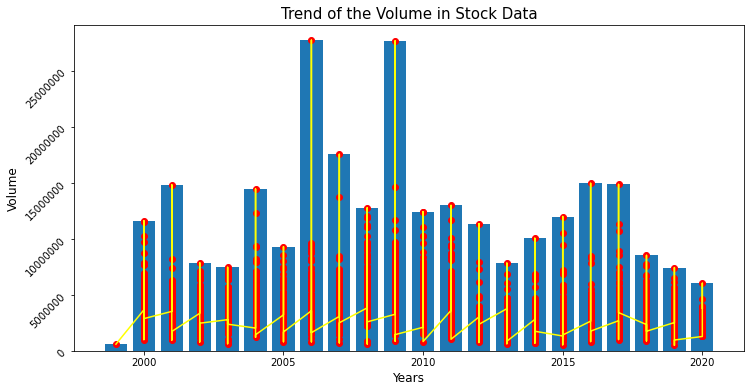

In [45]:
xpoints = year
ypoints = df["Volume"]

plt.figure(figsize=(12, 6))
plt.bar(xpoints, ypoints)
plt.scatter(xpoints, ypoints,color = "red")
plt.plot(xpoints, ypoints,color = "yellow")

plt.yticks(rotation = 45, ha = 'right')
plt.ticklabel_format(style='plain',axis = "y")
plt.xlabel("Years",fontsize=12)
plt.ylabel("Volume",fontsize=12)

plt.title("Trend of the Volume in Stock Data",fontsize=15)
plt.show()

***General Analysis on the Intial Column of the data for Identifying the Mean, Min and Max according to each unique year by grouping according to the year.***

In [46]:
df_Box1 = df[["Open"]]
df_Box1["Year"] = year
df_Box1 = pd.DataFrame(df_Box1)

In [47]:
a = df_Box1.groupby(df_Box1['Year'])['Open'].agg(['min', 'mean', 'max'])
a

,min,mean,max
Year,,,
1999,45.750000,45.750000,45.750000
2000,42.000000,71.338790,100.625000
2001,30.250000,44.190252,61.599998
2002,18.049999,32.663968,48.200001
2003,23.049999,36.151191,49.730000
2004,31.360001,43.036706,51.990002
2005,32.299999,36.688294,41.320000
2006,26.959999,34.011315,41.000000
2007,30.570000,35.587689,40.900002


*Common Function for Detecting Outliers*

This takes numeric data as an input argument then we find the mean and standard deviation of the all the data points.

We find the z score for each of the data point in the dataset and if the z score is greater than 3 than we can classify that point as an outlier. Any point outside of 3 standard deviations would be an outlier.

In [48]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

**iii) Visualize the outliers**

**Plotting the Data in Distribution and Box Plots**

Using these plots we find the distribution if they are equally distributed or skewed towards one side and the Box plot shows how much data falls below the median and above it.

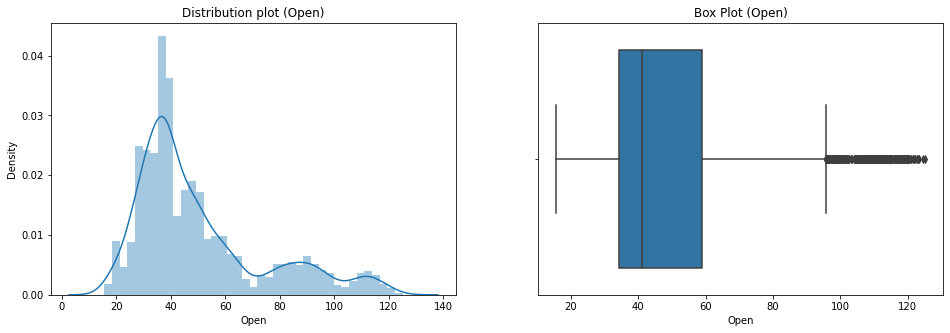

In [49]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df.Open)
plt.title("Distribution plot (Open)")

plt.subplot(1,2,2)
sns.boxplot(df.Open)
plt.title("Box Plot (Open)")

plt.show()

**Using IQR for getting outlier points**

The IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle.

Arrange the data in increasing order then

Calculate first(q1) and third quartile(q3) after which we Find interquartile range (q3-q1) also the bounds as follows

Find lower bound q1*1.5

Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier

In [50]:
Open_sort = sorted(df["Open"])
q1, q3= np.percentile(df["Open"],[25,75])
iqr = q3 - q1
lower_bound_open = q1 -(1.5 * iqr) 
upper_bound_open = q3 +(1.5 * iqr) 

print("The Lower Bound for (Open) is: ",lower_bound_open)
print("The Upper Bound for (Open) is: ",upper_bound_open)

outlier_datapoints_Open = detect_outlier(df.Open)
print("The Outliers for (Open) are as follows")
print(outlier_datapoints_Open)

The Lower Bound for (Open) is:  -2.6649995000000075
The Upper Bound for (Open) is:  95.61499650000002
The Outliers for (Open) are as follows
[123.190002, 122.779999, 122.080002, 121.629997, 121.779999, 125.059998, 124.400002, 122.919998]


 ***Repeating the same for High Column in the Dataset***

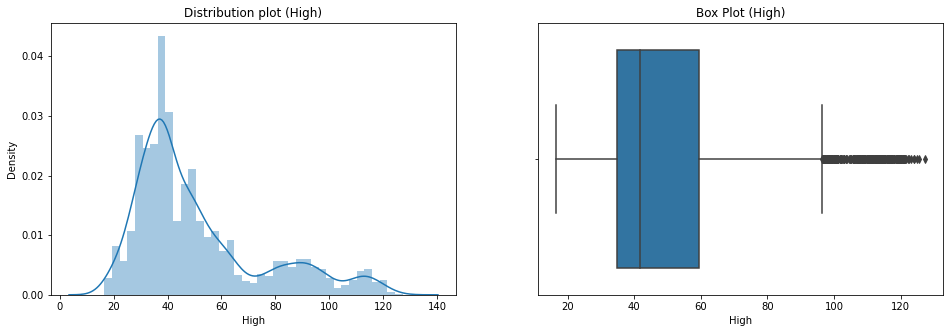

In [51]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df.High)
plt.title("Distribution plot (High)")

plt.subplot(1,2,2)
sns.boxplot(df.High)
plt.title("Box Plot (High)")

plt.show()

In [52]:
High_sort = sorted(df["High"])
q1, q3= np.percentile(df["High"],[25,75])
iqr = q3 - q1
lower_bound_high = q1 -(1.5 * iqr) 
upper_bound_high = q3 +(1.5 * iqr) 

print("The Lower Bound for (High) is: ",lower_bound_high)
print("The Upper Bound for (High) is: ",upper_bound_high)

outlier_datapoints_High = detect_outlier(df.High)
print("The Outliers for (High) are as follows")
print(outlier_datapoints_High)

The Lower Bound for (High) is:  -2.2750064999999964
The Upper Bound for (High) is:  96.4850055
The Outliers for (High) are as follows
[124.790001, 124.099998, 123.040001, 127.300003, 125.57, 123.970001]


*Repeating the same for Low Column in the Dataset*

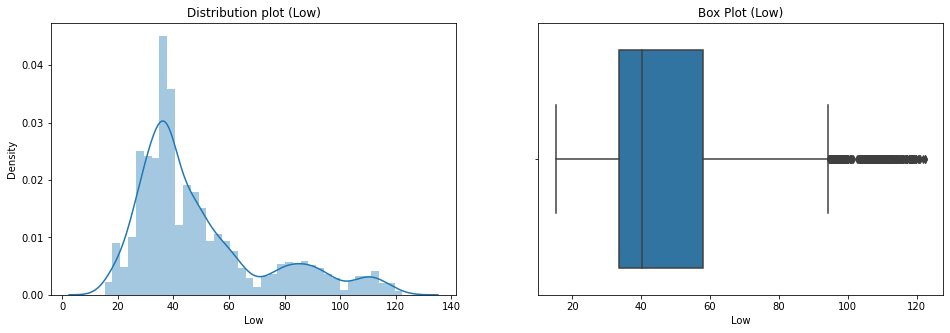

In [53]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df.Low)
plt.title("Distribution plot (Low)")

plt.subplot(1,2,2)
sns.boxplot(df.Low)
plt.title("Box Plot (Low)")

plt.show()

In [54]:
Low_sort = sorted(df["Low"])
q1, q3= np.percentile(df["Low"],[25,75])
iqr = q3 - q1
lower_bound_low = q1 -(1.5 * iqr) 
upper_bound_low = q3 +(1.5 * iqr) 

print("The Lower Bound for (Low) is: ",lower_bound_low)
print("The Upper Bound for (Low) is: ",upper_bound_low)

outlier_datapoints_Low = detect_outlier(df.Low)
print("The Outliers for (Low) are as follows")
print(outlier_datapoints_Low)

The Lower Bound for (Low) is:  -2.8100079999999963
The Upper Bound for (Low) is:  94.47000799999999
The Outliers for (Low) are as follows
[120.510002, 120.580002, 121.709999, 120.82, 122.389999, 122.370003, 120.809998]


*Repeating the same for Close Column in the Dataset*

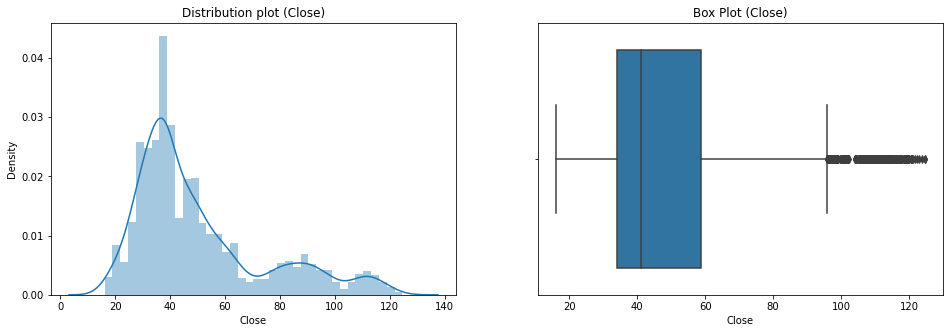

In [55]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df.Close)
plt.title("Distribution plot (Close)")

plt.subplot(1,2,2)
sns.boxplot(df.Close)
plt.title("Box Plot (Close)")

plt.show()

In [56]:
Close_sort = sorted(df["Close"])
q1, q3= np.percentile(df["Close"],[25,75])
iqr = q3 - q1
lower_bound_close = q1 -(1.5 * iqr) 
upper_bound_close = q3 +(1.5 * iqr) 

print("The Lower Bound for (Close) is: ",lower_bound_close)
print("The Upper Bound for (Close) is: ",upper_bound_close)

outlier_datapoints_Close = detect_outlier(df.Close)
print("The Outliers for (Close) are as follows")
print(outlier_datapoints_Close)

The Lower Bound for (Close) is:  -2.799998500000008
The Upper Bound for (Close) is:  95.7599975
The Outliers for (Close) are as follows
[124.639999, 122.18, 121.800003, 123.889999, 124.550003, 122.760002]


*Repeating the same for Adj Close Column in the Dataset*

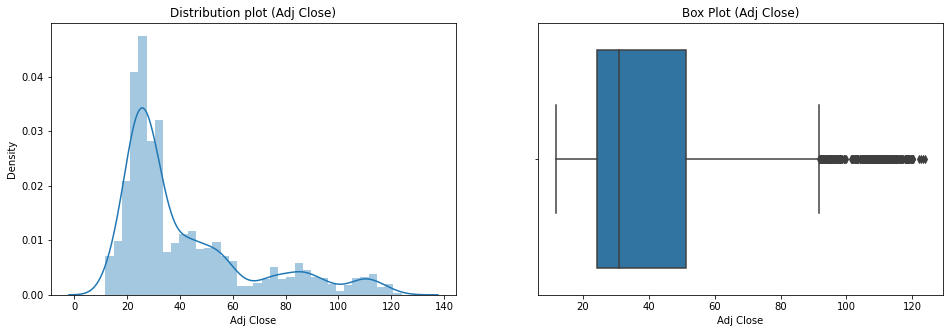

In [57]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["Adj Close"])
plt.title("Distribution plot (Adj Close)")

plt.subplot(1,2,2)
sns.boxplot(df["Adj Close"])
plt.title("Box Plot (Adj Close)")

plt.show()

In [58]:
Close_sort = sorted(df["Adj Close"])
q1, q3= np.percentile(df["Adj Close"],[25,75])
iqr = q3 - q1
lower_bound_adjclose = q1 -(1.5 * iqr) 
upper_bound_adjclose = q3 +(1.5 * iqr) 

print("The Lower Bound for (Adj Close) is: ",lower_bound_adjclose)
print("The Upper Bound for (Adj Close) is: ",upper_bound_adjclose)

outlier_datapoints_AdjClose = detect_outlier(df["Adj Close"])
print("The Outliers for (Adj Close) are as follows")
print(outlier_datapoints_AdjClose)

The Lower Bound for (Adj Close) is:  -16.1569135
The Upper Bound for (Adj Close) is:  91.79804250000001
The Outliers for (Adj Close) are as follows
[118.116135, 122.765144, 120.342148, 119.967865, 119.386734, 119.140495, 118.128777, 118.2183, 118.178513, 118.059158, 119.173111, 118.526619, 119.073654, 119.083603, 118.805107, 118.2183, 118.198402, 119.779823, 117.671265, 118.93441, 120.008583, 120.008583, 117.929863, 118.417213, 118.884682, 118.486839, 118.825005, 118.665863, 119.769875, 120.207497, 118.168564, 118.23819, 117.929863, 123.221138, 123.877579, 122.097244]


*Repeating the same for Volume Column in the Dataset*

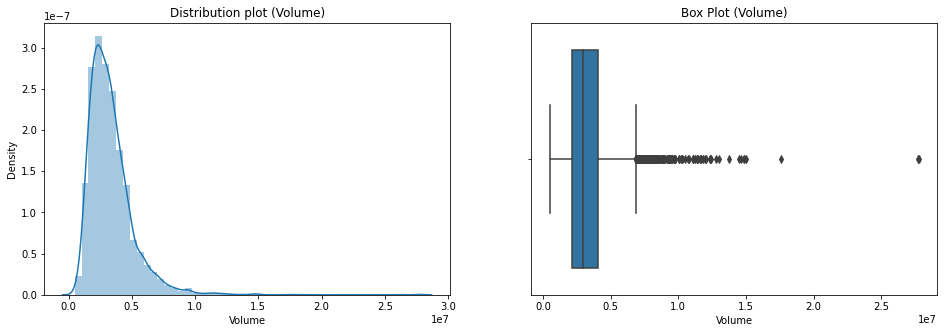

In [59]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

sns.distplot(df["Volume"])
plt.title("Distribution plot (Volume)")
plt.subplot(1,2,2)

sns.boxplot(df["Volume"])
plt.title("Box Plot (Volume)")

plt.show()

In [60]:
Volume_sort = sorted(df["Volume"])
q1, q3= np.percentile(df["Volume"],[25,75])
iqr = q3 - q1
lower_bound_volume = q1 -(1.5 * iqr) 
upper_bound_volume = q3 +(1.5 * iqr) 

print("The Lower Bound for (Volume) is: ",lower_bound_volume)
print("The Upper Bound for (Volume) is: ",upper_bound_volume)

outlier_datapoints_Volume = detect_outlier(df["Volume"])
print("The Outliers for (Volume) are as follows")
print(outlier_datapoints_Volume)

The Lower Bound for (Volume) is:  -641250.0
The Upper Bound for (Volume) is:  6843950.0
The Outliers for (Volume) are as follows
[11478600, 10253000, 9743600, 8694400, 11619400, 14827800, 12330900, 9405100, 14452300, 9311700, 9298400, 8899900, 8758100, 27748000, 9650300, 9443700, 9153100, 13706000, 17552400, 9493300, 11840800, 11062800, 12779300, 9216500, 9333600, 8962400, 9524500, 8642400, 10232200, 8983900, 11215100, 9382600, 9731600, 12015200, 11045400, 9566400, 9218300, 9542600, 8867900, 8783100, 9190500, 9714700, 10767400, 27693900, 9536500, 8904200, 11696100, 14627100, 10230000, 10258200, 12425800, 9662300, 11079100, 12363500, 8798300, 10044200, 9427700, 8762000, 11665300, 12990200, 9291000, 9435500, 11347400, 10052700, 10493700, 9485000, 11994700, 14963000, 14864300, 11366000, 8927600, 8580200, 10736900]


***iv) How many times open price surpassed the close price of the stock***

In [61]:
df['Open > Close'] = np.where(df['Open']>=df['Close'], 
                                           'Surpassed', 'Short')

df["Open > Close"].value_counts()

Surpassed    2579
Short        2498
Name: Open > Close, dtype: int64

In [62]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Open > Close
0,1999-12-31,45.750000,47.250000,45.656250,46.500000,31.572819,591800,Short
1,2000-01-03,46.750000,46.937500,44.000000,45.093750,30.618002,3655600,Surpassed
2,2000-01-04,44.750000,45.750000,42.781250,42.812500,29.069048,2533200,Surpassed
3,2000-01-05,42.812500,44.125000,41.593750,43.437500,29.493437,3228000,Short
4,2000-01-06,43.437500,43.812500,41.625000,42.250000,28.687130,2601000,Surpassed
...,...,...,...,...,...,...,...,...
5072,2020-03-02,110.089996,111.440002,107.239998,111.269997,111.269997,3979400,Short
5073,2020-03-03,110.129997,113.190002,106.570000,107.199997,107.199997,3416000,Surpassed
5074,2020-03-04,109.000000,112.540001,106.680000,112.459999,112.459999,2181000,Short
5075,2020-03-05,109.029999,112.070000,107.919998,108.870003,108.870003,2197200,Surpassed
